In [1]:
#Set dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy.stats as st

sensors = ['42019','42043','42044','42047','8764314','8770613', 'TABS-X']
monthsf = ['0617','0717','0817','0917']

wx_type = ['air_pressure(mBar)', 
           'air_temperature', 
           'sea_water_practical_salinity', 
           'sea_water_temperature',
           'wind_speed']

filepath_csv = "../data/"
filepath = "../images/"
hurricane = "Harvey_v2"
year = 2017

In [2]:
# Read final csv file into a dataframes for postanalysis
df = pd.read_csv(f'{filepath_csv}{hurricane}_{year}.csv')
                   
print(f'Reading csvfile {hurricane}_{year}...{len(df)} records')
print()
df.shape

Reading csvfile Harvey_v2_2017...27028 records



(27028, 10)

In [3]:
# Display the dateframe
df.head()

,Unnamed: 0,date,sensor,latitude,longitude,air_pressure(mBar),air_temperature,sea_water_practical_salinity,sea_water_temperature,wind_speed
0,0,2017-06-01 00:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1013.9,24.4,NaN,27.0,6.0
1,1,2017-06-01 01:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1013.4,25.1,NaN,27.0,2.0
2,2,2017-06-01 02:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1014.5,25.5,NaN,27.0,2.0
3,3,2017-06-01 03:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1015.6,25.6,NaN,27.0,3.0
4,4,2017-06-01 04:50:00+00:00,ioos:station:wmo:42019:1,27.907,-95.353,1015.3,25.6,NaN,27.0,4.0


In [4]:
print(len(df))
df_sensor = df.groupby(['sensor']).count()
df_sensor

27028


,Unnamed: 0,date,latitude,longitude,air_pressure(mBar),air_temperature,sea_water_practical_salinity,sea_water_temperature,wind_speed
sensor,,,,,,,,,
ioos:station:NOAA.NOS.CO-OPS:8764314:1,2400,2400,2400,2400,2400,2400,2400,2400,2400
ioos:station:NOAA.NOS.CO-OPS:8770613:1,2366,2366,2366,2366,2366,2366,2366,2366,2366
ioos:station:TABS:X:1,5806,5806,5806,5806,5806,5806,5806,5806,5806
ioos:station:wmo:42019:1,2401,2401,2401,2401,2401,2401,0,2401,2401
ioos:station:wmo:42043:1,3370,3370,3370,3370,3342,3370,2439,3335,3370
ioos:station:wmo:42044:1,5853,5853,5853,5853,5853,5167,5853,5853,5853
ioos:station:wmo:42047:1,4832,4832,4832,4832,4832,4832,1728,3104,4832


In [5]:
sens0 = []
sens1 = []
sens2 = []
sens3 = []
sens4 = []
sens5 = []
sens6 = []

# Define sensor type list
sensor_type = [
    'ioos:station:wmo:42019:1',
    'ioos:station:wmo:42043:1',
    'ioos:station:wmo:42044:1',
    'ioos:station:wmo:42047:1',
    'ioos:station:NOAA.NOS.CO-OPS:8764314:1',
    'ioos:station:NOAA.NOS.CO-OPS:8770613:1',
    'ioos:station:TABS:X:1'
]

# for loop to assign each row to its corresponding sensor and adding it its list
for i in range(len(df)):
        if df['sensor'][i] == sensor_type[0]:
            sens0.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[1]:
            sens1.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[2]:
            sens2.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[3]:
            sens3.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[4]:
            sens4.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[5]:
            sens5.append(df.iloc[i,:])
        if df['sensor'][i] == sensor_type[6]:
            sens6.append(df.iloc[i,:])


In [6]:
# Creat a new dataframe for each sensor list
df_sens0 = pd.DataFrame(sens0)
df_sens1 = pd.DataFrame(sens1)
df_sens2 = pd.DataFrame(sens2)
df_sens3 = pd.DataFrame(sens3)
df_sens4 = pd.DataFrame(sens4)
df_sens5 = pd.DataFrame(sens5)
df_sens6 = pd.DataFrame(sens6)

In [7]:
# Create formatted sensor_type list for box plot labels
srt = [
    '42019',
    '42043',
    '42044',
    '42047',
    '8764314',
    '8770613',
    'TABS'
]

CRC = []

In [8]:
# Create correlations and p-value results between wind speed and other weather types per sensor type
def getcorr(df,srt):
    airp = df["air_pressure(mBar)"].dropna()
    airt = df["air_temperature"].dropna()
    seasal = df["sea_water_practical_salinity"].dropna()
    seatemp = df["sea_water_temperature"].dropna()
    wind = df["wind_speed"].dropna()

    corr1 = [0,0]
    corr2 = [0,0]
    corr3 = [0,0]
    corr4 = [0,0]

    if len(wind) == len(airp):
            corr1 = st.pearsonr(wind, airp)
    if len(wind) == len(airt):
            corr2 = st.pearsonr(wind, airt)
    if len(wind) == len(seasal):
            corr3 = st.pearsonr(wind, seasal)
    if len(wind) == len(seatemp):
            corr4 = st.pearsonr(wind, seatemp)
    
    print('-'*40)
    print(f'analyzing correlation for sensor {srt}')
    print('-'*40)
    print('Air Pressure')
    print(f"The correlation coefficient (r) is {round(corr1[0],2)}")
    print(f"The p-value is {corr1[1]}")
    print()
    print('Air Temperature')
    print(f"The correlation coefficient (r) is {round(corr2[0],2)}")
    print(f"The p-value is {corr2[1]}")
    print()
    print('Sea Water Salinity')
    print(f"The correlation coefficient (r) is {round(corr3[0],2)}")
    print(f"The p-value is {corr3[1]}")
    print()
    print('Sea Water Temperature')
    print(f"The correlation coefficient (r) is {round(corr4[0],2)}")
    print(f"The p-value is {corr4[1]}")
    print('-'*40)
    
    correlation = {
        "Air Pressure": corr1[0],
        "Air Temperature": corr2[0],
        "Sea Water Salinity": corr3[0],
        "Sea Water Temperature": corr4[0]
    }
    
    return correlation

In [9]:
CRC.append(getcorr(df_sens0,srt[0]))

----------------------------------------
analyzing correlation for sensor 42019
----------------------------------------
Air Pressure
The correlation coefficient (r) is -0.49
The p-value is 2.3101145668236525e-148

Air Temperature
The correlation coefficient (r) is -0.21
The p-value is 9.833847910102693e-26

Sea Water Salinity
The correlation coefficient (r) is 0
The p-value is 0

Sea Water Temperature
The correlation coefficient (r) is -0.3
The p-value is 1.0203588809607518e-51
----------------------------------------


In [10]:
CRC.append(getcorr(df_sens1,srt[1]))

----------------------------------------
analyzing correlation for sensor 42043
----------------------------------------
Air Pressure
The correlation coefficient (r) is 0
The p-value is 0

Air Temperature
The correlation coefficient (r) is -0.34
The p-value is 1.7033867142315463e-91

Sea Water Salinity
The correlation coefficient (r) is 0
The p-value is 0

Sea Water Temperature
The correlation coefficient (r) is 0
The p-value is 0
----------------------------------------


In [11]:
CRC.append(getcorr(df_sens2,srt[2]))

----------------------------------------
analyzing correlation for sensor 42044
----------------------------------------
Air Pressure
The correlation coefficient (r) is -0.33
The p-value is 7.860838389711029e-148

Air Temperature
The correlation coefficient (r) is 0
The p-value is 0

Sea Water Salinity
The correlation coefficient (r) is -0.22
The p-value is 1.2532399623992889e-65

Sea Water Temperature
The correlation coefficient (r) is 0.22
The p-value is 5.564462555192345e-65
----------------------------------------


In [12]:
CRC.append(getcorr(df_sens3,srt[3]))

----------------------------------------
analyzing correlation for sensor 42047
----------------------------------------
Air Pressure
The correlation coefficient (r) is -0.46
The p-value is 6.073548311298248e-248

Air Temperature
The correlation coefficient (r) is -0.3
The p-value is 1.84929888029786e-104

Sea Water Salinity
The correlation coefficient (r) is 0
The p-value is 0

Sea Water Temperature
The correlation coefficient (r) is 0
The p-value is 0
----------------------------------------


In [13]:
CRC.append(getcorr(df_sens4,srt[4]))

----------------------------------------
analyzing correlation for sensor 8764314
----------------------------------------
Air Pressure
The correlation coefficient (r) is -0.53
The p-value is 3.602785016151618e-173

Air Temperature
The correlation coefficient (r) is -0.29
The p-value is 7.328231891968699e-48

Sea Water Salinity
The correlation coefficient (r) is 0.25
The p-value is 1.5672022328858342e-34

Sea Water Temperature
The correlation coefficient (r) is -0.28
The p-value is 5.22172975463189e-43
----------------------------------------


In [14]:
CRC.append(getcorr(df_sens5,srt[5]))

----------------------------------------
analyzing correlation for sensor 8770613
----------------------------------------
Air Pressure
The correlation coefficient (r) is -0.48
The p-value is 2.3771027660327193e-134

Air Temperature
The correlation coefficient (r) is -0.11
The p-value is 6.692459773991268e-08

Sea Water Salinity
The correlation coefficient (r) is -0.02
The p-value is 0.40022733272541405

Sea Water Temperature
The correlation coefficient (r) is -0.2
The p-value is 2.5601922791321248e-23
----------------------------------------


In [15]:
CRC.append(getcorr(df_sens6,srt[6]))

----------------------------------------
analyzing correlation for sensor TABS
----------------------------------------
Air Pressure
The correlation coefficient (r) is 0.01
The p-value is 0.310804535541315

Air Temperature
The correlation coefficient (r) is 0.34
The p-value is 5.63322722957764e-160

Sea Water Salinity
The correlation coefficient (r) is -0.1
The p-value is 2.331587156018149e-15

Sea Water Temperature
The correlation coefficient (r) is 0.39
The p-value is 1.1521657955721184e-214
----------------------------------------


In [16]:
df_crc = pd.DataFrame(CRC)
df_crc

,Air Pressure,Air Temperature,Sea Water Salinity,Sea Water Temperature
0,-0.494610,-0.211715,0.000000,-0.301717
1,0.000000,-0.339166,0.000000,0.000000
2,-0.329058,0.000000,-0.220922,0.219826
3,-0.456928,-0.304859,0.000000,0.000000
4,-0.528984,-0.290418,0.246428,-0.275336
5,-0.476427,-0.110718,-0.017302,-0.202511
6,0.013304,0.342984,-0.103713,0.393786


In [17]:
df_crc.rename(index={0:srt[0], 1:srt[1], 2:srt[2], 3:srt[3], 4:srt[4], 5:srt[5], 6:srt[6] }, inplace=True)
df_crc

,Air Pressure,Air Temperature,Sea Water Salinity,Sea Water Temperature
42019,-0.494610,-0.211715,0.000000,-0.301717
42043,0.000000,-0.339166,0.000000,0.000000
42044,-0.329058,0.000000,-0.220922,0.219826
42047,-0.456928,-0.304859,0.000000,0.000000
8764314,-0.528984,-0.290418,0.246428,-0.275336
8770613,-0.476427,-0.110718,-0.017302,-0.202511
TABS,0.013304,0.342984,-0.103713,0.393786


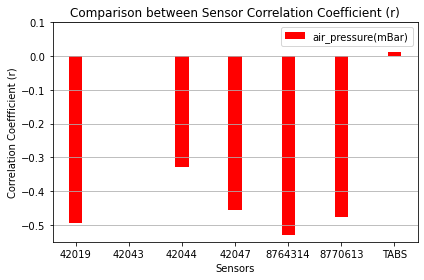

In [18]:
labels = srt
width = 0.25
x = np.arange(len(srt))

fig, ax = plt.subplots(figsize = (6,4))
p1 = ax.bar(x, df_crc['Air Pressure'], color='r', width=width, label=wx_type[0])
ax.set_title("Comparison between Sensor Correlation Coefficient (r)")
ax.set_ylabel("Correlation Coeffficient (r)")
ax.set_xlabel("Sensors")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(-0.55,0.1)
ax.yaxis.grid()

ax.legend()

fig.tight_layout()

# Save the chart
plt.savefig(os.path.join(filepath,"correlation_airpressure.png"))

# Show the chart
plt.show()

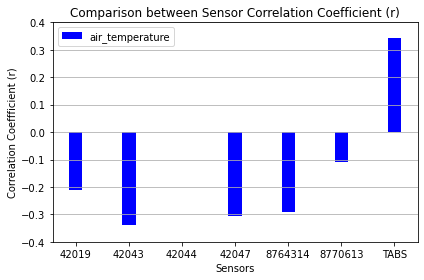

In [19]:
labels = srt
width = 0.25
x = np.arange(len(srt))

fig, ax = plt.subplots(figsize = (6,4))
p2 = ax.bar(x, df_crc['Air Temperature'], color='b', width=width, label=wx_type[1])
ax.set_title("Comparison between Sensor Correlation Coefficient (r)")
ax.set_ylabel("Correlation Coeffficient (r)")
ax.set_xlabel("Sensors")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(-0.4,0.4)
ax.yaxis.grid()

ax.legend()

fig.tight_layout()

# Save the chart
plt.savefig(os.path.join(filepath,"correlation_airtemperature.png"))

# Show the chart
plt.show()

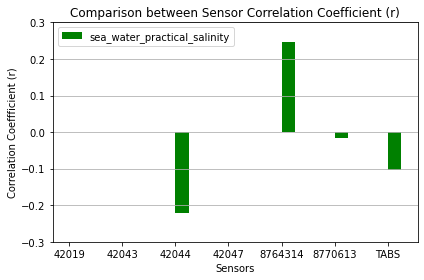

In [20]:
labels = srt
width = 0.25
x = np.arange(len(srt))

fig, ax = plt.subplots(figsize = (6,4))
p3 = ax.bar(x + width/2, df_crc['Sea Water Salinity'], color='g', width=width, label=wx_type[2])
ax.set_title("Comparison between Sensor Correlation Coefficient (r)")
ax.set_ylabel("Correlation Coeffficient (r)")
ax.set_xlabel("Sensors")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(-0.30,0.30)
ax.yaxis.grid()

ax.legend()

fig.tight_layout()

# Save the chart
plt.savefig(os.path.join(filepath,"correlation_seasalinity.png"))

# Show the chart
plt.show()

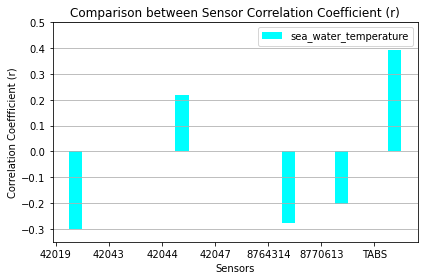

In [21]:
labels = srt
width = 0.25
x = np.arange(len(srt))

fig, ax = plt.subplots(figsize = (6,4))
p4 = ax.bar(x + width + width/2, df_crc['Sea Water Temperature'], color='cyan', width=width, label=wx_type[3])
ax.set_title("Comparison between Sensor Correlation Coefficient (r)")
ax.set_ylabel("Correlation Coeffficient (r)")
ax.set_xlabel("Sensors")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(-0.35,0.50)
ax.yaxis.grid()

ax.legend()

fig.tight_layout()

# Save the chart
plt.savefig(os.path.join(filepath,"correlation_seatemperature.png"))

# Show the chart
plt.show()